In [1]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(patchwork)
library(tibble)
library(qs)
library(ggplot2)
library(ggridges)
library(tidyr)
library(RColorBrewer)
library(readxl)
library(stringr)
library(ggpubr) 
library(viridis)
library(reshape)
library(forestploter)
library(grid)
library(pheatmap)

seed <- 123
set.seed(seed)
options(dplyr.summarise.inform = FALSE)
setwd("~/integration_project/step_14/11march_final/")

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


qs 0.25.6

Loading required package: viridisLite


Attaching package: ‘reshape’


The following objects are masked from ‘package:tidyr’:

    expand, smiths


The following object is masked from ‘package:dplyr’:

    rename




In [53]:
exl_file <- read_excel("/home/a.garg/integration_project/step_14/11march_final/combined_all_plots.xlsx", sheet = "Sheet3", .name_repair = "minimal")

In [42]:
exl_file

Cell_state,Layer 2,Layer 3,Layer 4,Layer 5,Layer 6,Reference
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Homeostatic,0.29653402,0.16353887,0.25236295,0.35171306,0.24777328,All
Activated,0.23234917,0.33971658,0.18336484,0.16274090,0.26072874,All
Homeostatic,0.03080873,0.06893910,0.26275992,0.48179872,0.40971660,Xenografted-mic
Activated,0.38382542,0.36805822,0.19754253,0.13918630,0.12874494,Xenografted-mic
Homeostatic,0.03080873,0.07238606,0.29111531,0.46680942,0.40080972,iPSC-MLC CRISPR i/a
Activated,0.32734275,0.41095366,0.22873346,0.12152034,0.07368421,iPSC-MLC CRISPR i/a
Homeostatic,0.17073171,0.08042895,0.17958412,0.44164882,0.42914980,Human parietal cortex
Activated,0.22721438,0.45346610,0.21455577,0.09100642,0.05344130,Human parietal cortex
Homeostatic,0.23234917,0.09574876,0.07939509,0.30085653,0.33117409,Human multiple region


Heatmap

In [54]:
#exl_file <- exl_file[,c(2:7)] 
exl_file$Reference <- make.unique(exl_file$Reference)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


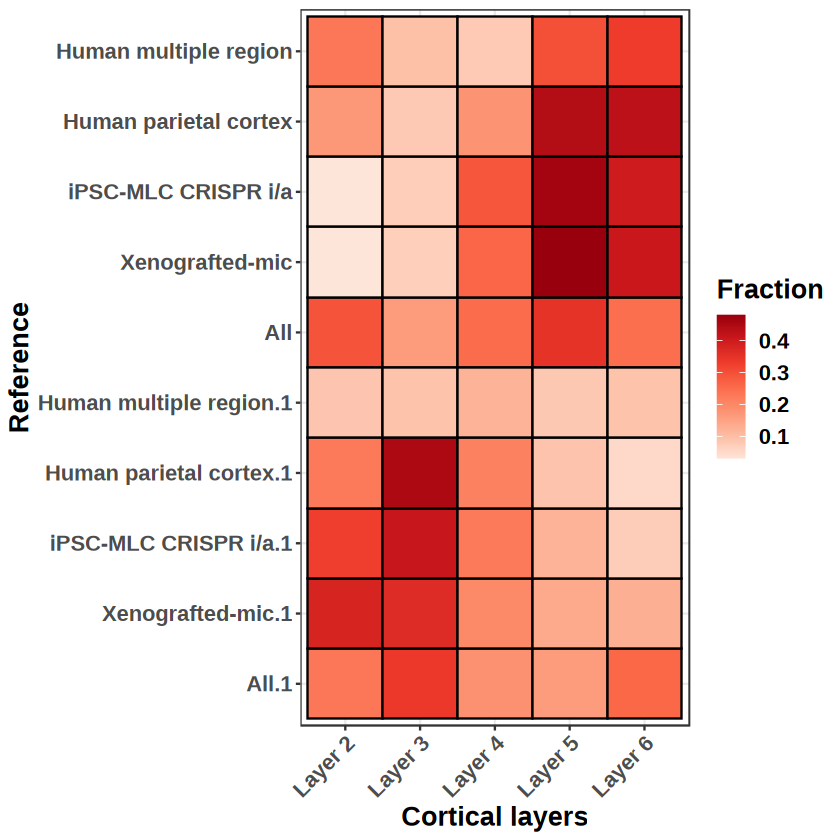

In [67]:
data <- exl_file%>% gather("Layer", "Fraction", -Reference,-Cell_state)
#data$Cell_state <- factor(data$Cell_state, levels = c("Homeostatic", "Activated"))
p <- data %>% ggplot(aes(x = Reference , y = Layer, fill = Fraction)) +   geom_tile() +  scale_fill_viridis()+
scale_fill_distiller(palette = "Reds", direction = 1) + 
xlab("Reference")+ylab("Cortical layers")+ 
#scale_fill_gradient2(low = "white", high = "red") + 
#ggtitle("layers (with top 25%)")+
#coord_fixed()+
coord_flip()+
geom_tile(color = "black", lwd = 0.5)+
theme_bw() + 
#geom_text(aes(label = round(Fraction, digits = 3)))+ 
  theme(text = element_text(size = 16, face = "bold"))
p <- p+theme(axis.text.x = element_text(angle = 45, hjust = 1))

p$data$Reference <- factor(x = p$data$Reference, levels = 
c('All.1','Xenografted-mic.1','iPSC-MLC CRISPR i/a.1','Human parietal cortex.1','Human multiple region.1',
'All','Xenografted-mic','iPSC-MLC CRISPR i/a','Human parietal cortex','Human multiple region'))
ggsave(p, filename= "combined_fraction_heatmap_new.pdf", height = 3, width = 6)
plot(p)



Heatmap with white and red

In [4]:
mydat <- exl_file[,c(2:6)] %>% as.matrix
rownames(mydat) <-  make.unique(exl_file$Reference)
mydat

,Layer 2,Layer 3,Layer 4,Layer 5,Layer 6
All,0.29653402,0.16353887,0.25236295,0.35171306,0.24777328
All.1,0.23234917,0.33971658,0.18336484,0.16274090,0.26072874
Xenografted-mic,0.03080873,0.06893910,0.26275992,0.48179872,0.40971660
Xenografted-mic.1,0.38382542,0.36805822,0.19754253,0.13918630,0.12874494
iPSC-MLC CRISPR i/a,0.03080873,0.07238606,0.29111531,0.46680942,0.40080972
iPSC-MLC CRISPR i/a.1,0.32734275,0.41095366,0.22873346,0.12152034,0.07368421
Human parietal cortex,0.17073171,0.08042895,0.17958412,0.44164882,0.42914980
Human parietal cortex.1,0.22721438,0.45346610,0.21455577,0.09100642,0.05344130
Human multiple region,0.23234917,0.09574876,0.07939509,0.30085653,0.33117409
Human multiple region.1,0.08729140,0.09191881,0.12003781,0.08351178,0.09230769


In [81]:
# Assuming 'mydf' is your data frame
mydf <- data.frame(`Cell_state` = c('Homeostatic','Activated','Homeostatic','Activated','Homeostatic',
                      'Activated','Homeostatic','Activated','Homeostatic','Activated'))

# Generate unique row names
unique_row_names <-c('All', 'All', 'Xenografted-mic', 'Xenografted-mic', 
                                 'iPSC-MLC CRISPR i/a', 'iPSC-MLC CRISPR i/a', 
                                 'Human parietal cortex', 'Human parietal cortex', 
                                 'Human multiple region', 'Human multiple region')
 

# Append numbers to make them unique
unique_row_names <- make.unique(unique_row_names)

# Assigning row names
rownames(mydf) <- unique_row_names

# Print the data frame to verify
print(mydf)

                         Cell_state
All                     Homeostatic
All.1                     Activated
Xenografted-mic         Homeostatic
Xenografted-mic.1         Activated
iPSC-MLC CRISPR i/a     Homeostatic
iPSC-MLC CRISPR i/a.1     Activated
Human parietal cortex   Homeostatic
Human parietal cortex.1   Activated
Human multiple region   Homeostatic
Human multiple region.1   Activated


In [82]:
mycolors <- c("#FF0000", '#3D3DD0')
names(mycolors) <- unique(mydf$Cell_state)
mycolors <- list(Cell_state = mycolors)
mycolors

$Cell_state
Homeostatic   Activated 
  "#FF0000"   "#3D3DD0"

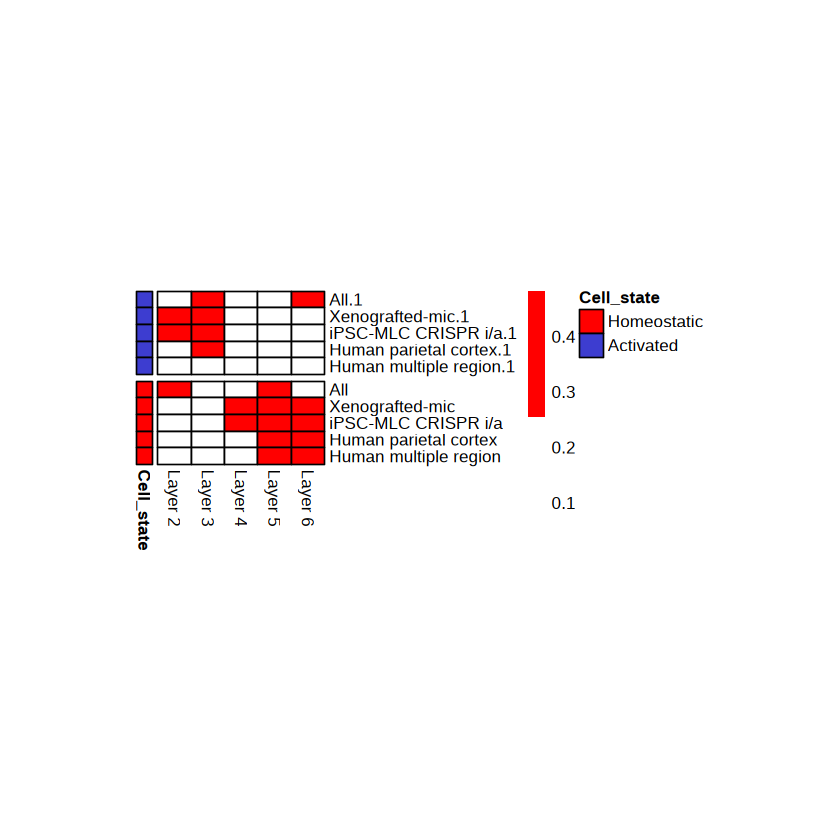

In [83]:
pheatmap(mydat[c(1,3,5,7,9,2,4,6,8,10),], cluster_cols = F, cluster_rows = F, annotation_row = mydf,
gaps_row = c(5),color = c("White","red"), annotation_colors = mycolors,
cellheight = 10, cellwidth = 20,border_color = "black" ) 

In [89]:
# save file
pheatmap(mydat[c(1,3,5,7,9,2,4,6,8,10),], cluster_cols = F, cluster_rows = F, annotation_row = mydf, gaps_row = c(5),color = c("White","red"),annotation_colors = mycolors,
cellheight = 10, cellwidth = 20, file = "combined_fraction_heatmap.pdf",border_color = "black"
)